<a href="https://colab.research.google.com/github/XingruiWang/RUC-Deep-Learning-Course/blob/master/Homework/HW_4/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Comparation Between Different Optimazors

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/RUC/DeepLearning/course7
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/RUC/DeepLearning/course7
data_facescore	data_foodscore	FoodScore.csv  程序


### 1. Loading required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Model, Input
from keras.layers import Dense,Flatten,Input
from keras.optimizers import SGD,RMSprop,Adam

from keras.utils import to_categorical 

In [3]:
## loading mnist dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

## One-hot encode y label
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

print(Y_train.shape) # 60000 * 10. 60000 means the amount of data, 10 means 10 classes of number in dataset.
print(Y_train[0]) # [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] means number 5

11493376/11490434 [==============================] - 0s 0us/step
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model by Keras

Model structure: a two-layer neural network

In [4]:
def NNModel(IMSIZE = 28, p = 1000, q = 10):  
    '''
    Define the model
    Parameter:
        IMSIZE: the size of input image, the width and height are same here.
        p: the number of neuron in first hidden layer, defult value is 1000
        q: the number of neuron in output layer，defult value is 10 since there are 10 classes.
    return:
        model: the keras model
    '''                                            
    input_layer = Input([IMSIZE,IMSIZE])       # MNIST图像为28*28的单层图片
    x = input_layer                              
    x = Flatten()(input_layer)                   # 将28*28*1的Tensor拉直为784维向量
    x = Dense(1000,activation = 'relu')(x)       # 全连接到1000个节点，并采用relu激活函数
    x = Dense(10,activation = 'softmax')(x)      # 全连接到10个节点，并采用softmax激活函数转化为(0,1)取值
    output_layer=x
    model=Model(input_layer,output_layer)    # Model函数将input_layer 和 output_layer中间的部分连接起来
    model.summary()
    return model

In [8]:
def Momentum(lr, momentum = 0.5):
    return SGD(lr = lr, momentum = momentum)


In [24]:
def train(model, X_train, X_test, y_train, y_test,
            batch_size = 128, epochs = 50,
            opt = SGD, lr = 0.001, 
            loss_type = "categorical_crossentropy",
            metrics = ['accuracy']):
    '''

    '''
    model.compile(loss = loss_type, optimizer = opt(lr = lr), metrics = metrics)
    history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = batch_size, epochs = epochs, verbose = 0)
    train_loss = history.history["loss"]

    return model, train_loss

In [21]:
def render_loss(losses, name):
    t = np.arange(len(losses[0]))
    for i, loss in enumerate(losses):
        print(i, loss)
        plt.plot(t, loss, label = name[i])
    plt.xlabel('Epochs')
    plt.ylabel('loss') 
    plt.show()

In [25]:
optimizors = ["SGD", "Momentum", "RMSprop", "Adam"]
losses = [None] * 4

for i, opt in enumerate(optimizors):
    print("Training %s "%(opt))
    model = NNModel()
    model, loss = train(model,  X_train, X_test, Y_train, Y_test, opt = eval(optimizors[i]))
    losses[i] = loss

Training SGD 
Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 5.0087 - accuracy: 0.9035 - val_loss: 0.9665 - val_accuracy: 0.9358
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5301 - accura

0 [26.877620697021484, 2.156327247619629, 1.456807255744934, 1.1061608791351318, 0.8865046501159668, 0.7309371829032898, 0.6171231865882874, 0.5255106091499329, 0.4502044916152954, 0.3884611427783966, 0.33812326192855835, 0.2956332862377167, 0.25858139991760254, 0.22698642313480377, 0.19987766444683075, 0.1745505928993225, 0.15369459986686707, 0.1358175128698349, 0.119856096804142, 0.10546425729990005, 0.09342805296182632, 0.08293431252241135, 0.07369124889373779, 0.06504761427640915, 0.05765078216791153, 0.050966303795576096, 0.04498959332704544, 0.04000958800315857, 0.03565880283713341, 0.03134467452764511, 0.027850441634655, 0.02486211620271206, 0.021916981786489487, 0.01960454322397709, 0.017485063523054123, 0.015754230320453644, 0.014067051000893116, 0.012692403048276901, 0.011423476040363312, 0.010249331593513489, 0.009291143156588078, 0.00833122618496418, 0.007513092365115881, 0.006880597211420536, 0.006255702581256628, 0.005704211536794901, 0.00522809661924839, 0.00477614579722

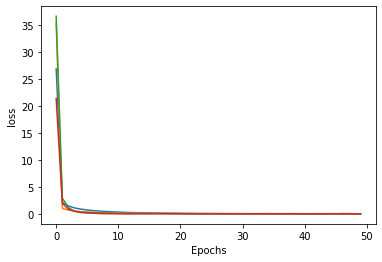

In [22]:
render_loss(losses, optimizors)